In [1]:
# Base libraries
import os
from os.path import isfile, join
import numpy as np
import pandas as pd
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
# NetworkX
import networkx as nx
import osmnx as ox
# OS environment setup
from local_directories import *

/opt/anaconda3/envs/gnn-urban-form/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Reset random seeds
random_seed = 2674
# Other
neighbourhood_min_nodes = 8
max_distance = 500

In [3]:
# Load Leciester's graph
leicester_osmnx_graph = ox.io.load_graphml(bulk_storage_directory + "/osmnx/raw_excluded/leicester-1864.graphml")
leicester_osmnx_graph_prj = ox.project_graph(leicester_osmnx_graph)

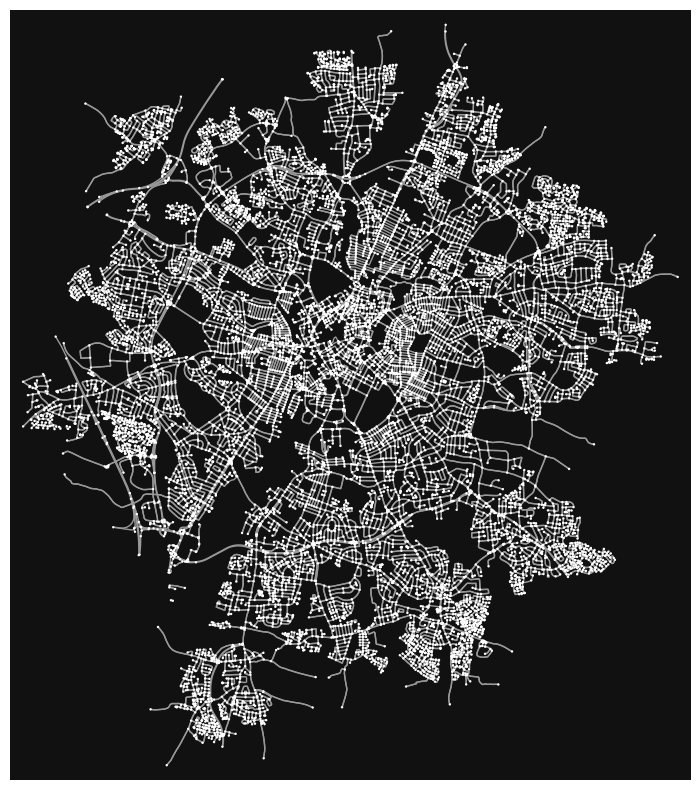

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [4]:
ox.plot_graph(
    leicester_osmnx_graph_prj,
    node_size=3,
    figsize=(10, 10))

In [5]:
# Load Leciester's base stats
leicester_osmnx_basic_stats = pd.read_csv(this_repo_directory + "/data/leicester-1864_basic_stats.csv")

In [6]:
# Load Leciester's embeddings
leicester_emb_df = pd.read_csv(this_repo_directory + "/data/leicester-1864_emb_gnnuf_model_v0-2.csv")

# UMAP

UMAP is applied on the 64 embeddings for dimensionality reduction. Two dimensions are extracted using high `n_neighbors` value (10% of the size of the dataset) to emphasise the global structure of the data over the local.

/opt/anaconda3/envs/gnn-urban-form/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


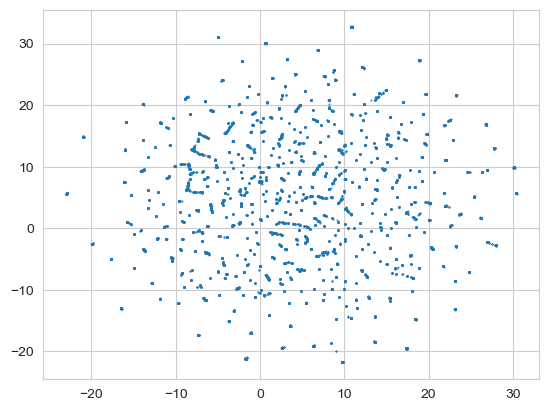

In [32]:
leicester_emb_umap = UMAP(n_neighbors=100, random_state=random_seed).fit_transform(leicester_emb_df)
plt.scatter(leicester_emb_umap[:,0], leicester_emb_umap[:,1], s=0.2)
plt.show()

In [33]:
# Add to the rest of the dataset
leicester_emb_df["UMAP0"] = leicester_emb_umap[:,0]
leicester_emb_df["UMAP1"] = leicester_emb_umap[:,1]
leicester_emb_df

osmnx_node_id    EMB000    EMB001    EMB002    EMB003    EMB004   
0             337976  0.002187 -0.140169  0.817075  0.018810 -0.059941  \
1             337979  0.009539 -0.141928  0.829485  0.026942 -0.070248   
2             337983  0.000091 -0.140042  0.808359  0.016419 -0.055715   
3             337985  0.000134 -0.140622  0.809997  0.016546 -0.056459   
4             337986  0.000091 -0.140042  0.808359  0.016419 -0.055715   
...              ...       ...       ...       ...       ...       ...   
12979     8270436113 -0.164801 -0.054660 -0.101539 -0.133340  0.151997   
12980     8270436114 -0.175542 -0.057977 -0.086745 -0.143021  0.162590   
12981     8270436115 -0.175542 -0.057977 -0.086745 -0.143021  0.162590   
12982     8270480133 -0.169253 -0.061446 -0.055785 -0.136851  0.154700   
12983     8270480134 -0.169253 -0.061446 -0.055785 -0.136851  0.154700   

         EMB005    EMB006    EMB007    EMB008  ...    EMB056    EMB057   
0     -0.072376 -0.016156  0.148080  0.022986  ... -0.041750 -0.187241  \
1     -0.075685 -0.019733  0.151069  0.019878  ... -0.032578 -0.198214   
2     -0.065202 -0.014535  0.144392  0.022841  ... -0.046886 -0.176426   
3     -0.068282 -0.014747  0.146286  0.023012  ... -0.045765 -0.180053   
4     -0.065202 -0.014535  0.144392  0.022841  ... -0.046886 -0.176426   
...         ...       ...       ...       ...  ...       ...       ...   
12979 -0.168895  0.084697  0.133461 -0.062300  ... -0.150573  0.134793   
12980 -0.158468  0.091713  0.133345 -0.053502  ... -0.157319  0.140209   
12981 -0.158468  0.091713  0.133345 -0.053502  ... -0.157319  0.140209   
12982 -0.153491  0.087003  0.133699 -0.050116  ... -0.154570  0.129643   
12983 -0.153491  0.087003  0.133699 -0.050116  ... -0.154570  0.129643   

         EMB058    EMB059    EMB060    EMB061    EMB062    EMB063      UMAP0   
0     -0.098746 -0.001646  0.003652  0.039163 -0.028328  0.092380  12.754024  \
1     -0.095907  0.002715  0.012754  0.037609 -0.038102  0.090046  12.754031   
2     -0.101276  0.000427  0.000069  0.043687 -0.021185  0.090886  12.754333   
3     -0.101011 -0.001037  0.000806  0.042573 -0.022940  0.091691  12.754133   
4     -0.101276  0.000427  0.000069  0.043687 -0.021185  0.090886  12.753890   
...         ...       ...       ...       ...       ...       ...        ...   
12979 -0.076352 -0.175108 -0.153172  0.044563  0.121819  0.027204   6.518228   
12980 -0.079602 -0.178523 -0.162892  0.046959  0.124655  0.030391   6.518611   
12981 -0.079602 -0.178523 -0.162892  0.046959  0.124655  0.030391   6.518147   
12982 -0.081290 -0.171140 -0.157598  0.047083  0.120563  0.033530   6.519401   
12983 -0.081290 -0.171140 -0.157598  0.047083  0.120563  0.033530   6.518274   

           UMAP1  
0     -11.067680  
1     -11.067602  
2     -11.067458  
3     -11.067401  
4     -11.067053  
...          ...  
12979   0.510324  
12980   0.510993  
12981   0.510278  
12982   0.510905  
12983   0.510553  

[12984 rows x 67 columns]

Plotting the UMAP0 and UMAP1 values on the map

In [34]:
for node in leicester_osmnx_graph_prj.nodes:
    if len(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP0"].values) == 0:
        leicester_osmnx_graph_prj.nodes[node]["UMAP0"] = None
        leicester_osmnx_graph_prj.nodes[node]["UMAP1"] = None
    else:
        leicester_osmnx_graph_prj.nodes[node]["UMAP0"] = float(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP0"].values)
        leicester_osmnx_graph_prj.nodes[node]["UMAP1"] = float(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP1"].values)

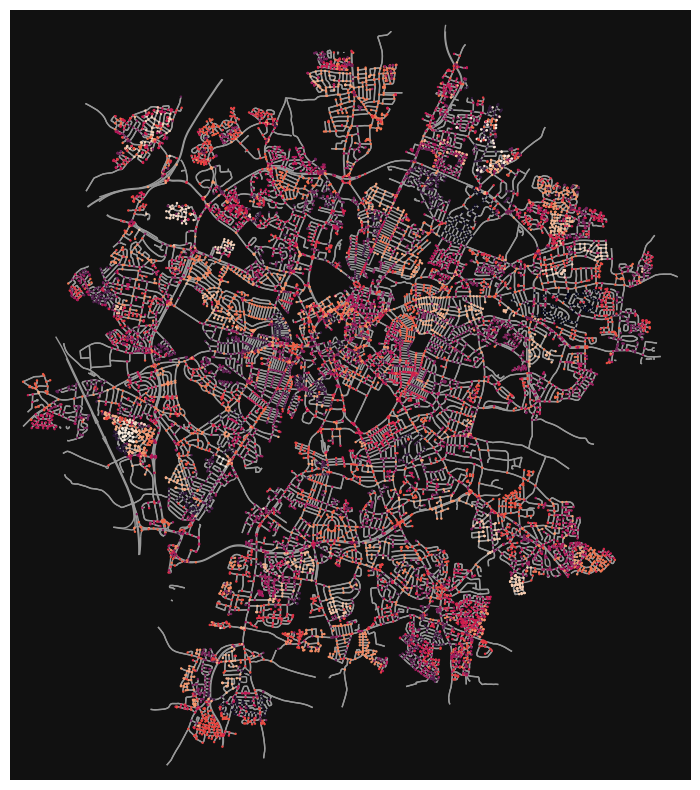

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [35]:
ox.plot_graph(leicester_osmnx_graph_prj, node_color=[
    leicester_osmnx_graph_prj.nodes[node]["UMAP0"] for node in leicester_osmnx_graph_prj.nodes],
    node_size=3,
    figsize=(10, 10))

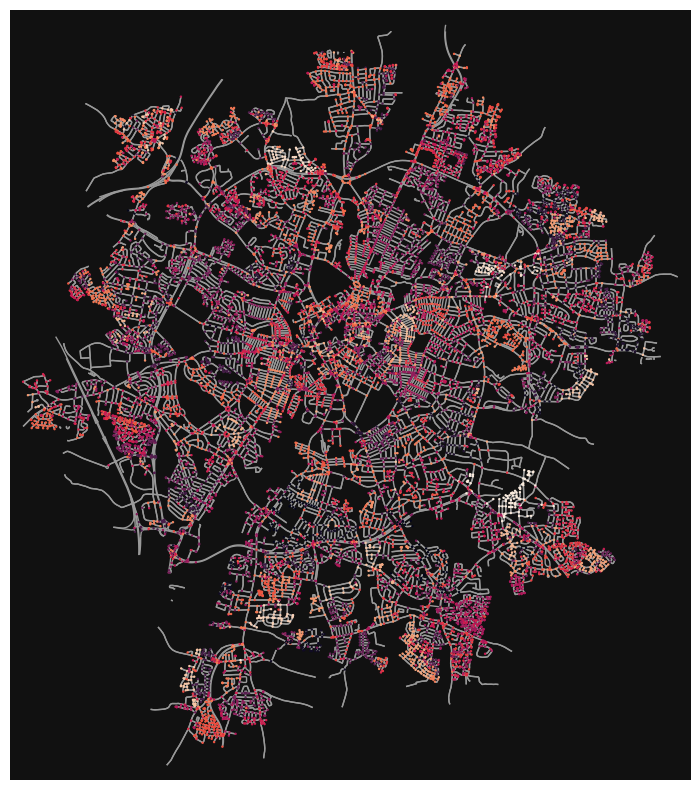

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [36]:
ox.plot_graph(leicester_osmnx_graph_prj, node_color=[
    leicester_osmnx_graph_prj.nodes[node]["UMAP1"] for node in leicester_osmnx_graph_prj.nodes],
    node_size=3,
    figsize=(10, 10))

Double-check the coloring above is correct

In [37]:
leicester_osmnx_graph_prj_df = None
for node in leicester_osmnx_graph_prj:
    node_dict = leicester_osmnx_graph_prj.nodes[node]
    node_dict["osmnx_node_id"] = str(node)
    if leicester_osmnx_graph_prj_df is None:
        leicester_osmnx_graph_prj_df = pd.DataFrame.from_dict([node_dict])
    else:
        leicester_osmnx_graph_prj_df = pd.concat([leicester_osmnx_graph_prj_df, pd.DataFrame.from_dict([node_dict])])
# leicester_osmnx_graph_prj_df.head()

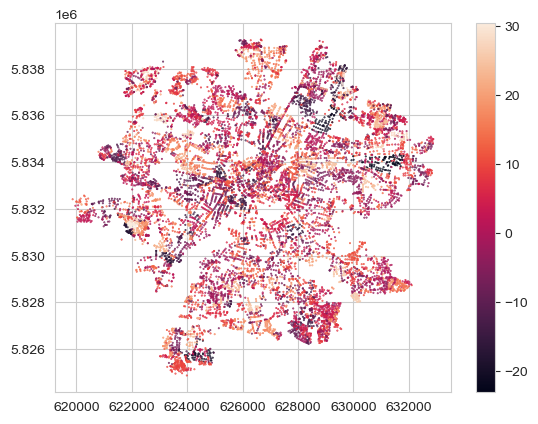

In [38]:
plt.scatter(
    x=leicester_osmnx_graph_prj_df["x"],
    y=leicester_osmnx_graph_prj_df["y"],
    c=leicester_osmnx_graph_prj_df["UMAP0"],
    s=0.2)
plt.colorbar()
plt.show()

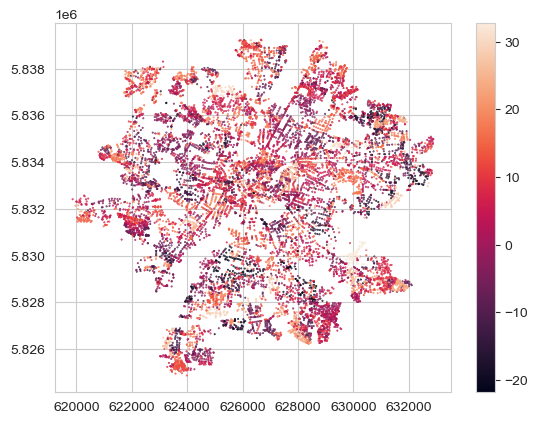

In [39]:
plt.scatter(
    x=leicester_osmnx_graph_prj_df["x"],
    y=leicester_osmnx_graph_prj_df["y"],
    c=leicester_osmnx_graph_prj_df["UMAP1"],
    s=0.2)
plt.colorbar()
plt.show()

## UMAP extreme values

Checking the ego-network of the nodes with the most extreme values in each direction (min and max) for both UMAP0 and UMAP1

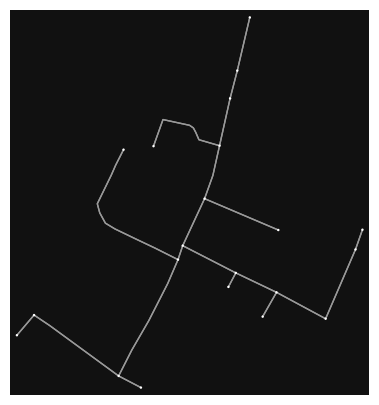

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [40]:
leicester_emb_UMAP0_min = leicester_emb_df[
    leicester_emb_df["UMAP0"] == leicester_emb_df["UMAP0"].min()
    ]["osmnx_node_id"].values[0]
ego_UMAP0_min = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP0_min,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP0_min_prj = ox.project_graph(ego_UMAP0_min)
ox.plot_graph(ego_UMAP0_min_prj, node_size=3, figsize=(5, 5))

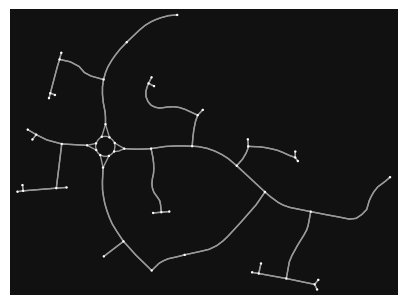

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [41]:
leicester_emb_UMAP0_max = leicester_emb_df[
    leicester_emb_df["UMAP0"] == leicester_emb_df["UMAP0"].max()
    ]["osmnx_node_id"].values[0]
ego_UMAP0_max = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP0_max,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP0_max_prj = ox.project_graph(ego_UMAP0_max)
ox.plot_graph(ego_UMAP0_max_prj, node_size=3, figsize=(5, 5))

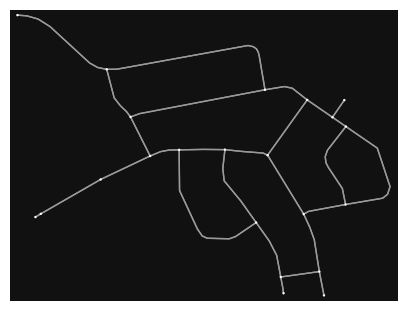

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [42]:
leicester_emb_UMAP1_min = leicester_emb_df[
    leicester_emb_df["UMAP1"] == leicester_emb_df["UMAP1"].min()
    ]["osmnx_node_id"].values[0]
ego_UMAP1_min = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP1_min,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP1_min_prj = ox.project_graph(ego_UMAP1_min)
ox.plot_graph(ego_UMAP1_min_prj, node_size=3, figsize=(5, 5))

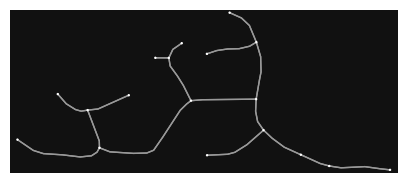

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [43]:
leicester_emb_UMAP1_max = leicester_emb_df[
    leicester_emb_df["UMAP1"] == leicester_emb_df["UMAP1"].max()
    ]["osmnx_node_id"].values[0]
ego_UMAP1_max = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP1_max,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP1_max_prj = ox.project_graph(ego_UMAP1_max)
ox.plot_graph(ego_UMAP1_max_prj, node_size=3, figsize=(5, 5))

## Correlations with basic stats

Checking correlations between UMAP0 and UMAP1 and all the basic statistics from OSMnx. No clear correlation found.

In [44]:
leicester_pairplot_df = pd.merge(
        leicester_emb_df[["osmnx_node_id", "UMAP0", "UMAP1"]],
        leicester_osmnx_basic_stats[["node_id",
            "n", "m", "k_avg", "edge_length_total", "edge_length_avg",
            "streets_per_node_avg", "intersection_count", "street_length_total",
            "street_segment_count", "street_length_avg", "circuity_avg"]],
        left_on="osmnx_node_id",
        right_on="node_id"
    ).drop(columns=["osmnx_node_id", "node_id"])

In [45]:
print(leicester_pairplot_df.corr(method="kendall"))

                         UMAP0     UMAP1         n         m     k_avg   
UMAP0                 1.000000  0.016295 -0.018271 -0.018377 -0.005216  \
UMAP1                 0.016295  1.000000 -0.004288 -0.009930 -0.032277   
n                    -0.018271 -0.004288  1.000000  0.903200 -0.019202   
m                    -0.018377 -0.009930  0.903200  1.000000  0.080372   
k_avg                -0.005216 -0.032277 -0.019202  0.080372  1.000000   
edge_length_total    -0.030412 -0.025734  0.619964  0.695611  0.287983   
edge_length_avg      -0.006754 -0.044870 -0.248455 -0.180095  0.420486   
streets_per_node_avg -0.025906 -0.030299  0.155012  0.200487  0.299551   
intersection_count   -0.017230 -0.018613  0.847989  0.863775  0.062570   
street_length_total  -0.030871 -0.025632  0.647887  0.703902  0.221320   
street_segment_count -0.017435 -0.012558  0.904967  0.908216  0.033473   
street_length_avg    -0.007282 -0.043164 -0.245817 -0.175778  0.436387   
circuity_avg         -0.031426  0.0065

## Node similarity

Compare all nodes to a selected one based on the 64 embeddings. The example below uses a node in Clarendon Park.

In [46]:
# # 52.616892, -1.116742
# for node in leicester_osmnx_graph.nodes:
#     if (
#         -1.117 < leicester_osmnx_graph.nodes[node]["x"] < -1.115 and
#         52.615 < leicester_osmnx_graph.nodes[node]["y"] < 52.617
#         ):
#         print(f"{node=}")
#         print(f"{leicester_osmnx_graph.nodes[node]}\n")
# del node

In [47]:
compare_to_node = 10389705

from scipy import spatial
leicester_osmnx_compare = leicester_osmnx_graph_prj.copy()
leicester_embeddings = leicester_emb_df.copy()
leicester_embeddings.set_index("osmnx_node_id", inplace=True, drop=True)
leicester_embeddings = leicester_embeddings.loc[:,"EMB000":"EMB063"]

for node in leicester_osmnx_compare.nodes:
    if node in leicester_emb_df["osmnx_node_id"].values:
        leicester_osmnx_compare.nodes[node]["test_distance"] = spatial.distance.euclidean(
            leicester_embeddings[leicester_embeddings.index == compare_to_node].to_numpy().squeeze(),
            leicester_embeddings[leicester_embeddings.index == node].to_numpy().squeeze()
        )
        if node == compare_to_node:
            leicester_osmnx_compare.nodes[node]["test_case"] = 1
        else:
            leicester_osmnx_compare.nodes[node]["test_case"] = 0
    else:
        leicester_osmnx_compare.nodes[node]["test_case"] = None
        leicester_osmnx_compare.nodes[node]["test_distance"] = None

test_distance_max = max([leicester_osmnx_compare.nodes[node]["test_distance"] if leicester_osmnx_compare.nodes[node]["test_distance"] is not None else 0 for node in leicester_osmnx_compare.nodes])

for node in leicester_osmnx_compare.nodes:
    if leicester_osmnx_compare.nodes[node]["test_distance"] is not None:
        leicester_osmnx_compare.nodes[node]["test_similarity"] = (
            test_distance_max - leicester_osmnx_compare.nodes[node]["test_distance"]
            ) / test_distance_max
    else:
        leicester_osmnx_compare.nodes[node]["test_similarity"] = None

print(leicester_osmnx_compare.nodes[compare_to_node])

{'y': 5831324.55655604, 'x': 627495.4632960256, 'street_count': 4, 'elevation': 89.0, 'elevation_aster': '94', 'elevation_srtm': '89', 'highway': 'traffic_signals', 'lon': -1.1167479, 'lat': 52.6169375, 'UMAP0': 10.948555946350098, 'UMAP1': 7.580808639526367, 'osmnx_node_id': '10389705', 'test_distance': 0.0, 'test_case': 1, 'test_similarity': 1.0}


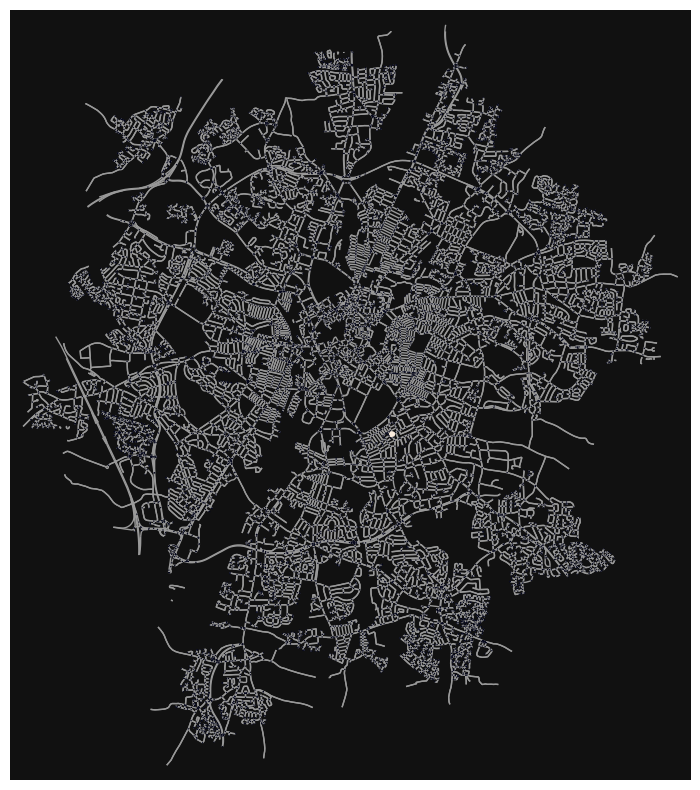

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [48]:
ox.plot_graph(
    leicester_osmnx_compare,
    node_color=[leicester_osmnx_compare.nodes[node]["test_case"] for node in leicester_osmnx_compare.nodes],
    node_size=[20 if leicester_osmnx_compare.nodes[node]["test_case"]==1 else 1 for node in leicester_osmnx_compare.nodes],
    figsize=(10, 10))

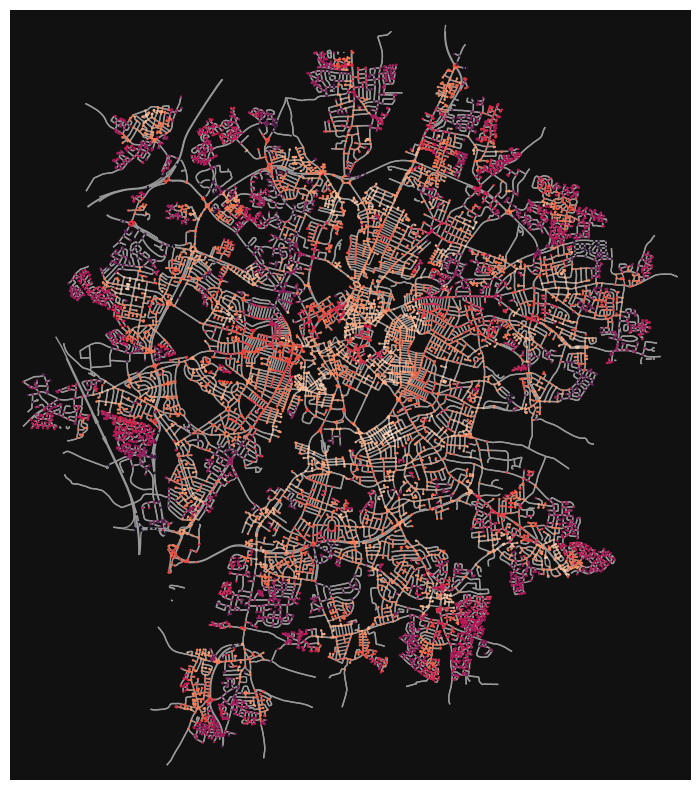

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [49]:
ox.plot_graph(
    leicester_osmnx_compare,
    node_color=[leicester_osmnx_compare.nodes[node]["test_similarity"] for node in leicester_osmnx_compare.nodes],
    node_size=3,
    figsize=(10, 10))

In [50]:
#bvColors <- c("#e8e8e8","#e4acac","#c85a5a",
#           "#b0d5df","#ad9ea5","#985356",
#           "#64acbe","#627f8c","#574249")

def bivariate_colour(x, limits):
    if x[0] is None or x[1] is None:
        return None
    else:
        if x[0] <= limits[0, 0]:
            if x[1] <= limits[1, 0]:
                # return "#e8e8e8"
                return "#e8e8e8"
            elif x[1] <= limits[1, 1]:
                # return "#cbb8d7"
                return "#e4acac"
            else:
                # return "#9972af"
                return "#c85a5a"
        if x[0] <= limits[0, 1]:
            if x[1] <= limits[1, 0]:
                # return "#e4d9ac"
                return "#b0d5df"
            elif x[1] <= limits[1, 1]:
                # return "#c8ada0"
                return "#ad9ea5"
            else:
                # return "#976b82"
                return "#985356"
        else:
            if x[1] <= limits[1, 0]:
                # return "#c8b35a"
                return "#64acbe"
            elif x[1] <= limits[1, 1]:
                # return "#af8e53"
                return "#627f8c"
            else:
                # return "#804d36"
                return "#574249"


In [51]:
bivariate_colour([5, 30], leicester_emb_df[["UMAP0", "UMAP1"]].quantile([1/3, 2/3]).values.transpose())

'#985356'

In [52]:
leicester_emb_df[leicester_emb_df["osmnx_node_id"] == 10389705][["UMAP0", "UMAP1"]].values

array([[10.948556 ,  7.5808086]], dtype=float32)

In [53]:
leicester_osmnx_bivariate = leicester_osmnx_graph_prj.copy()
leicester_emb_bivariate_df = leicester_emb_df.copy()
leicester_emb_bivariate_df["bivariate_colour"] = None

for node in leicester_osmnx_compare.nodes:
    if node in leicester_emb_df["osmnx_node_id"].values:
        node_bivariate_colour = bivariate_colour(
            leicester_emb_df.loc[leicester_emb_df["osmnx_node_id"] == node, ["UMAP0", "UMAP1"]].values[0],
            leicester_emb_df[["UMAP0", "UMAP1"]].quantile([1/3, 2/3]).values.transpose()
        )
    else:
        node_bivariate_colour = "#000000"
    leicester_osmnx_bivariate.nodes[node]["bivariate_colour"] = node_bivariate_colour
    leicester_emb_df.loc[leicester_emb_df["osmnx_node_id"] == node, "bivariate_colour"] = node_bivariate_colour

print(leicester_osmnx_bivariate.nodes[10389705])

{'y': 5831324.55655604, 'x': 627495.4632960256, 'street_count': 4, 'elevation': 89.0, 'elevation_aster': '94', 'elevation_srtm': '89', 'highway': 'traffic_signals', 'lon': -1.1167479, 'lat': 52.6169375, 'UMAP0': 10.948555946350098, 'UMAP1': 7.580808639526367, 'osmnx_node_id': '10389705', 'bivariate_colour': '#627f8c'}


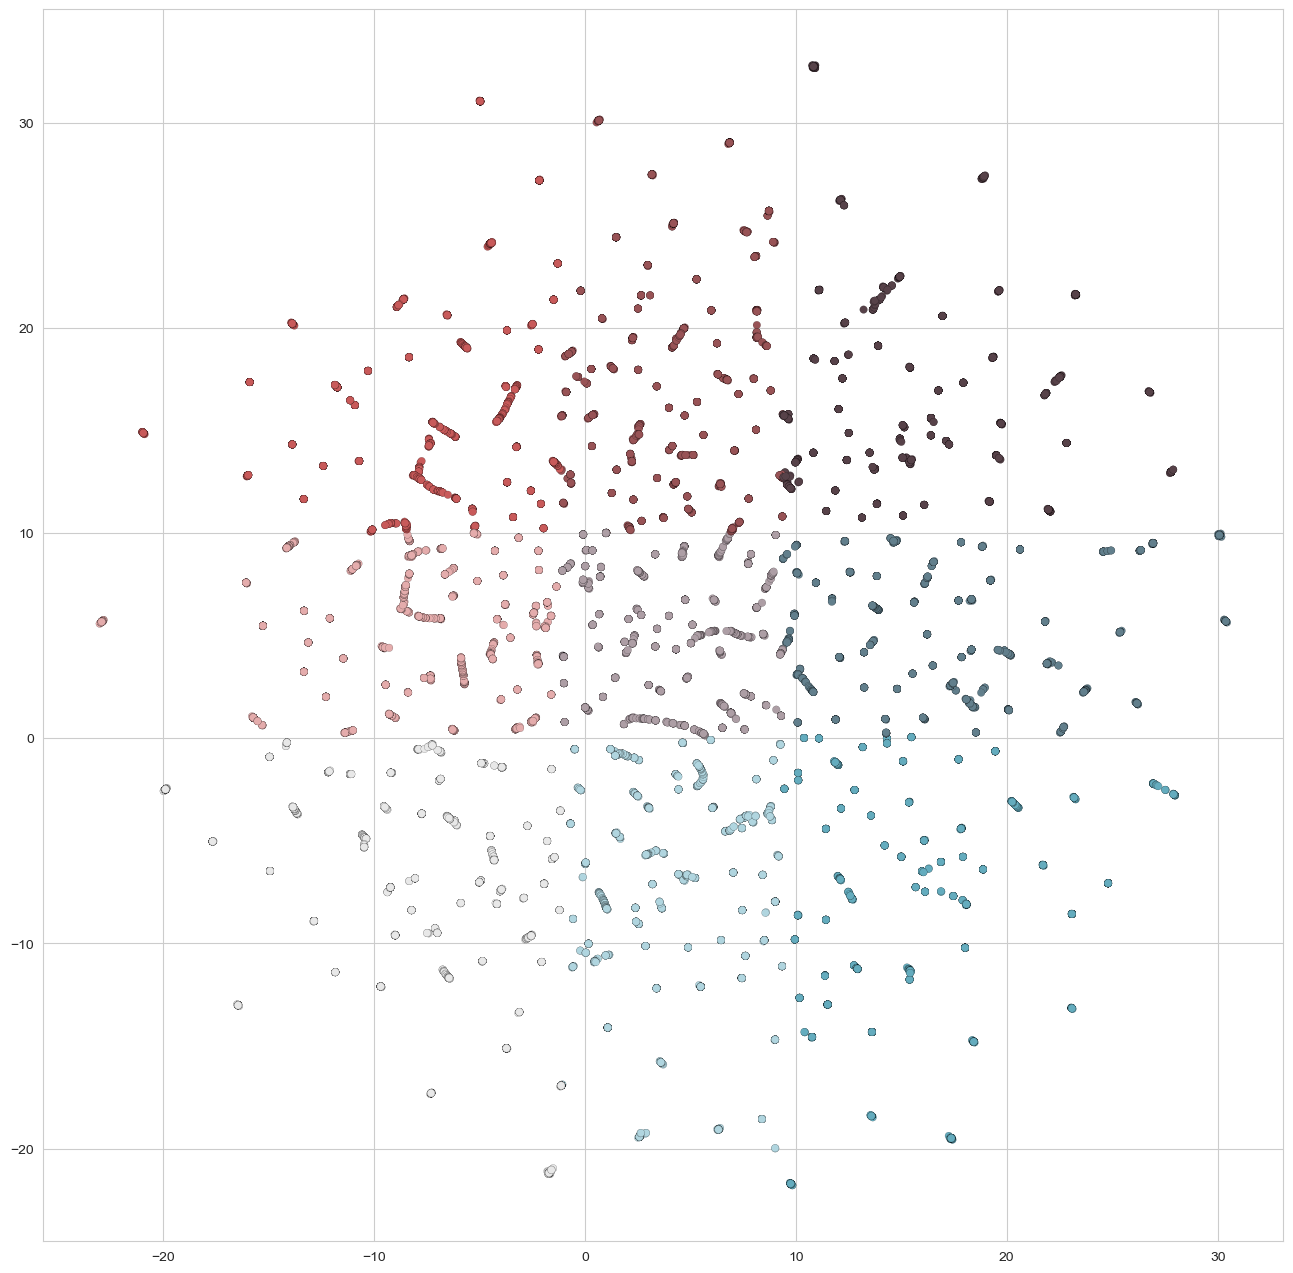

In [54]:
plt.figure(figsize=(16,16))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(
    x=leicester_emb_df["UMAP0"].values, y=leicester_emb_df["UMAP1"].values,
    c=leicester_emb_df["bivariate_colour"].values,
    s=30, edgecolors='black', linewidth=0.1)
plt.show()

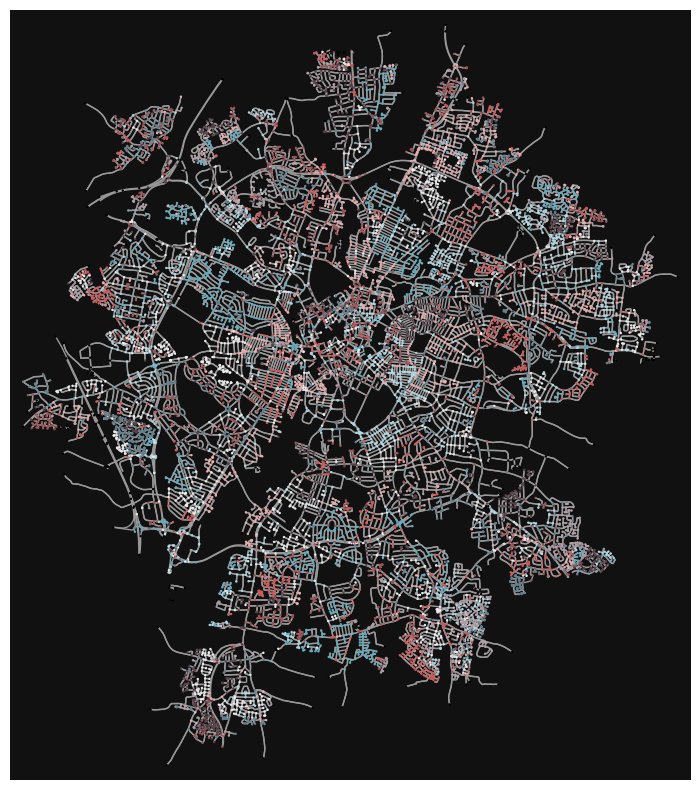

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [55]:
ox.plot_graph(
    leicester_osmnx_bivariate,
    node_color=[leicester_osmnx_bivariate.nodes[node]["bivariate_colour"] for node in leicester_osmnx_bivariate.nodes],
    node_size=3,
    figsize=(10, 10))

In [56]:
leicester_osmnx_bivariate_df = None
for node in leicester_osmnx_bivariate:
    node_dict = leicester_osmnx_bivariate.nodes[node]
    node_dict["osmnx_node_id"] = str(node)
    if leicester_osmnx_bivariate_df is None:
        leicester_osmnx_bivariate_df = pd.DataFrame.from_dict([node_dict])
    else:
        leicester_osmnx_bivariate_df = pd.concat([leicester_osmnx_bivariate_df, pd.DataFrame.from_dict([node_dict])])
# leicester_osmnx_bivariate_df.head()

In [57]:
leicester_osmnx_bivariate_df.head()

y              x  street_count  elevation elevation_aster   
0  5.829804e+06  622151.977595             3       72.0              35  \
0  5.829991e+06  622098.041002             3       72.0              45   
0  5.828827e+06  622259.813792             2       79.0              57   
0  5.830107e+06  622077.742140             3       79.0              43   
0  5.829673e+06  622220.645785             3       74.0              35   

  elevation_srtm       lon        lat     UMAP0     UMAP1 osmnx_node_id   
0             72 -1.196195  52.604506       NaN       NaN        194739  \
0             72 -1.196922  52.606196       NaN       NaN    1551014281   
0             79 -1.194965  52.595696       NaN       NaN        326312   
0             79 -1.197179  52.607245       NaN       NaN        326320   
0             74 -1.195230  52.603314 -6.446413 -3.887528    2627867454   

  bivariate_colour  ref            highway  
0          #000000  NaN                NaN  
0          #000000  NaN                NaN  
0          #000000   21  motorway_junction  
0          #000000   21  motorway_junction  
0          #e8e8e8  NaN                NaN

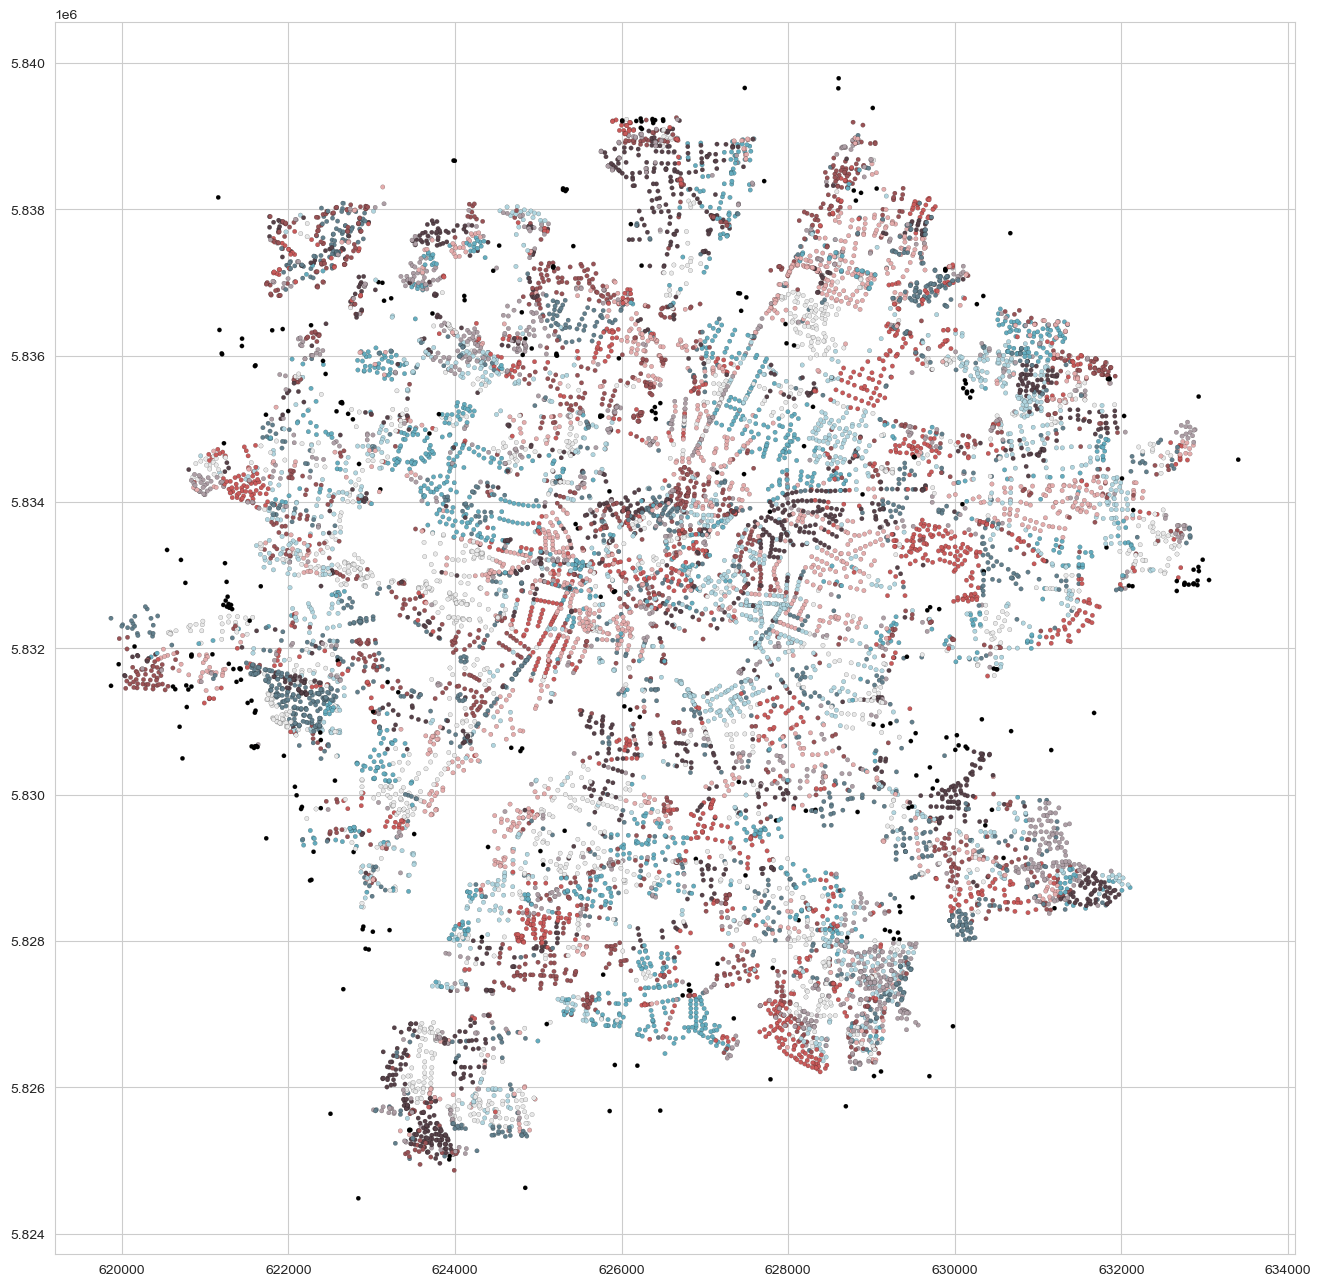

In [58]:
leicester_osmnx_bivariate_df_toplot = leicester_osmnx_bivariate_df[["x", "y", "bivariate_colour"]].dropna()
plt.figure(figsize=(16,16))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(
    x=leicester_osmnx_bivariate_df_toplot["x"],
    y=leicester_osmnx_bivariate_df_toplot["y"],
    c=leicester_osmnx_bivariate_df_toplot["bivariate_colour"],
    s=10, edgecolors='black', linewidth=0.1)
plt.show()

In [59]:
from sklearn.cluster import DBSCAN
leicester_emb_df_clust = leicester_emb_df[["UMAP0", "UMAP1"]].dropna()
clust = DBSCAN(eps=1, min_samples=10)
leicester_emb_df["clust"] = clust.fit_predict(leicester_emb_df_clust)
clust_top = leicester_emb_df[leicester_emb_df["clust"]!=-1].groupby("clust").size().sort_values(ascending = False).head(8).index
clust_top_colors = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#ffff33", "#a65628", "#f781bf"]
clust_top_and_colors = dict(zip(clust_top, clust_top_colors))
leicester_emb_df["clust_color"] = leicester_emb_df["clust"].apply(lambda x:
    clust_top_and_colors[x] if x in clust_top_and_colors.keys() else "#f2f2f2")
leicester_emb_df

osmnx_node_id    EMB000    EMB001    EMB002    EMB003    EMB004   
0             337976  0.002187 -0.140169  0.817075  0.018810 -0.059941  \
1             337979  0.009539 -0.141928  0.829485  0.026942 -0.070248   
2             337983  0.000091 -0.140042  0.808359  0.016419 -0.055715   
3             337985  0.000134 -0.140622  0.809997  0.016546 -0.056459   
4             337986  0.000091 -0.140042  0.808359  0.016419 -0.055715   
...              ...       ...       ...       ...       ...       ...   
12979     8270436113 -0.164801 -0.054660 -0.101539 -0.133340  0.151997   
12980     8270436114 -0.175542 -0.057977 -0.086745 -0.143021  0.162590   
12981     8270436115 -0.175542 -0.057977 -0.086745 -0.143021  0.162590   
12982     8270480133 -0.169253 -0.061446 -0.055785 -0.136851  0.154700   
12983     8270480134 -0.169253 -0.061446 -0.055785 -0.136851  0.154700   

         EMB005    EMB006    EMB007    EMB008  ...    EMB059    EMB060   
0     -0.072376 -0.016156  0.148080  0.022986  ... -0.001646  0.003652  \
1     -0.075685 -0.019733  0.151069  0.019878  ...  0.002715  0.012754   
2     -0.065202 -0.014535  0.144392  0.022841  ...  0.000427  0.000069   
3     -0.068282 -0.014747  0.146286  0.023012  ... -0.001037  0.000806   
4     -0.065202 -0.014535  0.144392  0.022841  ...  0.000427  0.000069   
...         ...       ...       ...       ...  ...       ...       ...   
12979 -0.168895  0.084697  0.133461 -0.062300  ... -0.175108 -0.153172   
12980 -0.158468  0.091713  0.133345 -0.053502  ... -0.178523 -0.162892   
12981 -0.158468  0.091713  0.133345 -0.053502  ... -0.178523 -0.162892   
12982 -0.153491  0.087003  0.133699 -0.050116  ... -0.171140 -0.157598   
12983 -0.153491  0.087003  0.133699 -0.050116  ... -0.171140 -0.157598   

         EMB061    EMB062    EMB063      UMAP0      UMAP1  bivariate_colour   
0      0.039163 -0.028328  0.092380  12.754024 -11.067680           #64acbe  \
1      0.037609 -0.038102  0.090046  12.754031 -11.067602           #64acbe   
2      0.043687 -0.021185  0.090886  12.754333 -11.067458           #64acbe   
3      0.042573 -0.022940  0.091691  12.754133 -11.067401           #64acbe   
4      0.043687 -0.021185  0.090886  12.753890 -11.067053           #64acbe   
...         ...       ...       ...        ...        ...               ...   
12979  0.044563  0.121819  0.027204   6.518228   0.510324           #ad9ea5   
12980  0.046959  0.124655  0.030391   6.518611   0.510993           #ad9ea5   
12981  0.046959  0.124655  0.030391   6.518147   0.510278           #ad9ea5   
12982  0.047083  0.120563  0.033530   6.519401   0.510905           #ad9ea5   
12983  0.047083  0.120563  0.033530   6.518274   0.510553           #ad9ea5   

       clust  clust_color  
0          0      #f2f2f2  
1          0      #f2f2f2  
2          0      #f2f2f2  
3          0      #f2f2f2  
4          0      #f2f2f2  
...      ...          ...  
12979     30      #ff7f00  
12980     30      #ff7f00  
12981     30      #ff7f00  
12982     30      #ff7f00  
12983     30      #ff7f00  

[12984 rows x 70 columns]

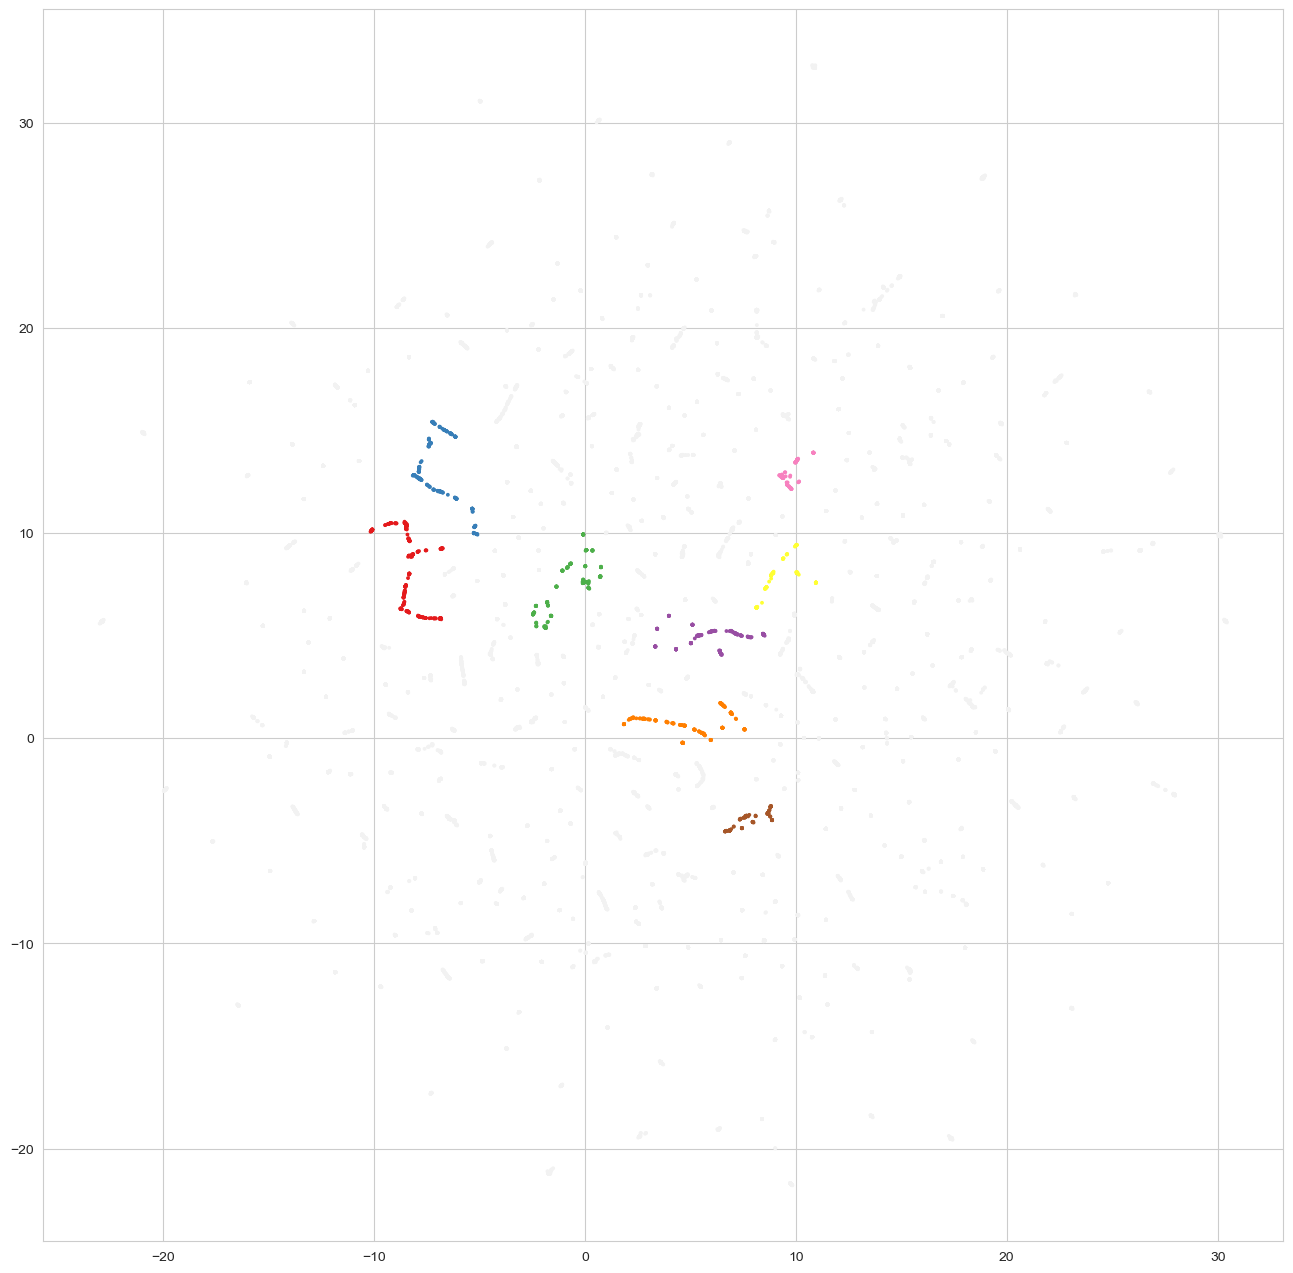

In [60]:
plt.figure(figsize=(16,16))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(
    x=leicester_emb_df["UMAP0"],
    y=leicester_emb_df["UMAP1"],
    c=leicester_emb_df["clust_color"],
    s=3)
plt.show()

In [61]:
leicester_osmnx_bivariate_df

y              x  street_count  elevation elevation_aster   
0   5.829804e+06  622151.977595             3       72.0              35  \
0   5.829991e+06  622098.041002             3       72.0              45   
0   5.828827e+06  622259.813792             2       79.0              57   
0   5.830107e+06  622077.742140             3       79.0              43   
0   5.829673e+06  622220.645785             3       74.0              35   
..           ...            ...           ...        ...             ...   
0   5.827851e+06  629133.278045             1      106.0             106   
0   5.827196e+06  628876.023592             1       98.0              98   
0   5.827211e+06  628943.099130             1       92.0              92   
0   5.827002e+06  628886.981023             1       92.0              92   
0   5.826873e+06  628934.372396             1       91.0              92   

   elevation_srtm       lon        lat     UMAP0     UMAP1 osmnx_node_id   
0              72 -1.196195  52.604506       NaN       NaN        194739  \
0              72 -1.196922  52.606196       NaN       NaN    1551014281   
0              79 -1.194965  52.595696       NaN       NaN        326312   
0              79 -1.197179  52.607245       NaN       NaN        326320   
0              74 -1.195230  52.603314 -6.446413 -3.887528    2627867454   
..            ...       ...        ...       ...       ...           ...   
0             107 -1.093926  52.585340  6.518835  0.510802    8270436103   
0              98 -1.097976  52.579513  6.516290  0.506285    8270436110   
0              99 -1.096980  52.579639  6.519048  0.510499    8270436112   
0              92 -1.097889  52.577769  6.518147  0.510278    8270436115   
0              91 -1.097241  52.576601  6.519401  0.510905    8270480133   

   bivariate_colour  ref            highway  
0           #000000  NaN                NaN  
0           #000000  NaN                NaN  
0           #000000   21  motorway_junction  
0           #000000   21  motorway_junction  
0           #e8e8e8  NaN                NaN  
..              ...  ...                ...  
0           #ad9ea5  NaN                NaN  
0           #ad9ea5  NaN                NaN  
0           #ad9ea5  NaN                NaN  
0           #ad9ea5  NaN                NaN  
0           #ad9ea5  NaN                NaN  

[13293 rows x 14 columns]

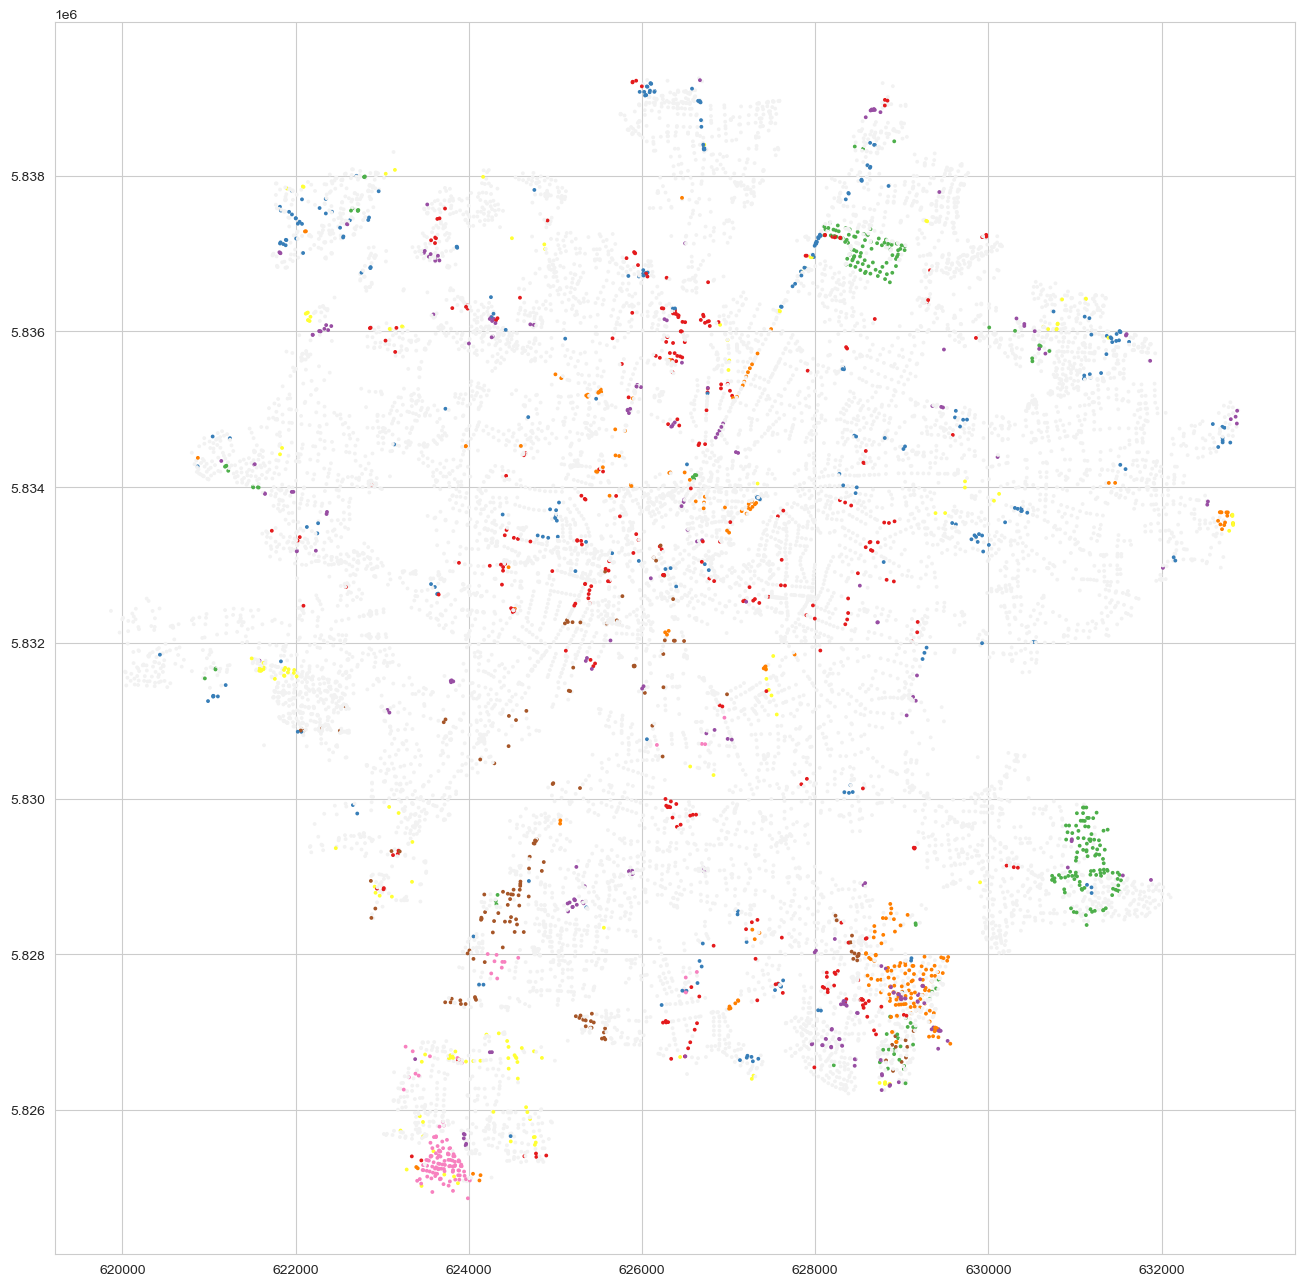

In [62]:
leicester_osmnx_bivariate_df_toplot = leicester_osmnx_bivariate_df.copy()
leicester_osmnx_bivariate_df_toplot["osmnx_node_id"] = leicester_osmnx_bivariate_df_toplot["osmnx_node_id"].astype(np.int64)
leicester_osmnx_bivariate_df_toplot = pd.merge(
    leicester_osmnx_bivariate_df_toplot,
    leicester_emb_df[["osmnx_node_id", "clust_color"]],
    on="osmnx_node_id")
leicester_osmnx_bivariate_df_toplot = leicester_osmnx_bivariate_df_toplot[["x", "y", "clust_color"]].dropna()

plt.figure(figsize=(16,16))
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(
    x=leicester_osmnx_bivariate_df_toplot["x"],
    y=leicester_osmnx_bivariate_df_toplot["y"],
    c=leicester_osmnx_bivariate_df_toplot["clust_color"],
    s=3)
plt.show()

In [63]:
leicester_osmnx_clusters = leicester_osmnx_graph_prj.copy()

for node in leicester_osmnx_clusters.nodes:
    if len(leicester_emb_df.loc[leicester_emb_df["osmnx_node_id"] == node, "clust_color"].values) > 0:
        leicester_osmnx_clusters.nodes[node]["clust_color"] = leicester_emb_df.loc[leicester_emb_df["osmnx_node_id"] == node, "clust_color"].values[0]
    else:
        leicester_osmnx_clusters.nodes[node]["clust_color"] = "#f2f2f2"

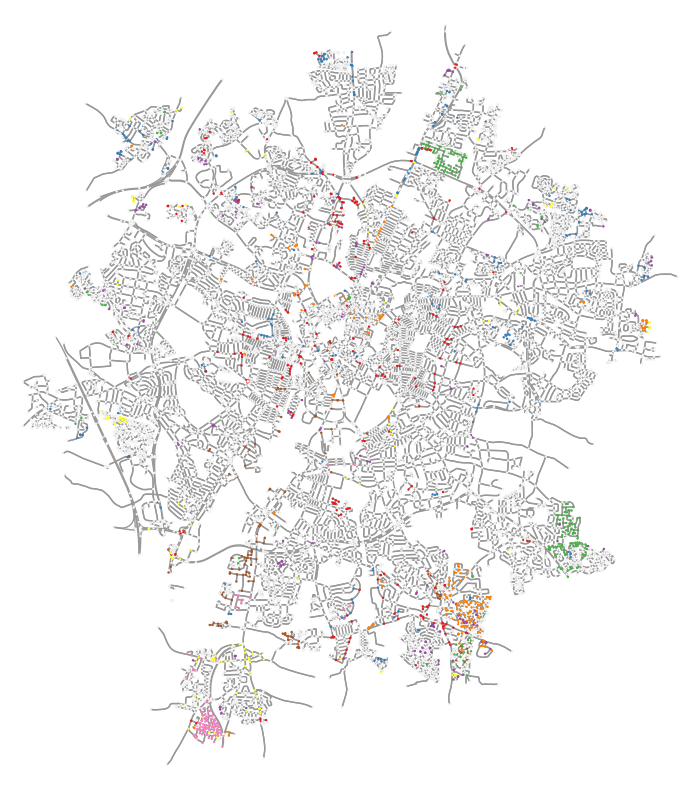

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [64]:
ox.plot_graph(
    leicester_osmnx_clusters,
    node_color=[leicester_osmnx_clusters.nodes[node]["clust_color"] for node in leicester_osmnx_bivariate.nodes],
    node_size=3, bgcolor="white",
    figsize=(10, 10))